In [ ]:
#A progressive pass is typically defined as a forward pass that moves the ball significantly closer to the opponent’s goal.

#A common definition (based on StatsBomb or Wyscout logic) is:

#A pass that:

# A.) Moves the ball at least 30% closer to goal if starting from the team's own half.
#OR
# B.) Moves the ball at least 15% closer if starting in the opponent's half.

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mplsoccer import Pitch
import highlight_text

In [4]:
df = pd.read_csv('MD28 - Atletico Madrid 2-4 Barcelona.csv')

In [6]:
qualifier_id_cols = [col for col in df.columns if "/qualifierId" in col]
qualifier_value_cols = [col.replace("/qualifierId", "/value") for col in qualifier_id_cols]

df['end_x'] = np.nan
df['end_y'] = np.nan

for id_col, value_col in zip(qualifier_id_cols, qualifier_value_cols):
    df['end_x'] = df.apply(lambda row: row[value_col] if row[id_col] == 140 else row['end_x'], axis=1)
    df['end_y'] = df.apply(lambda row: row[value_col] if row[id_col] == 141 else row['end_y'], axis=1)

In [8]:
df['x'] = pd.to_numeric(df['x'], errors='coerce')
df['y'] = pd.to_numeric(df['y'], errors='coerce')
df['end_x'] = pd.to_numeric(df['end_x'], errors='coerce')
df['end_y'] = pd.to_numeric(df['end_y'], errors='coerce')

In [14]:
pd.set_option('display.max_columns', None)

In [16]:
df.head()

,id,eventId,typeId,periodId,timeMin,timeSec,contestantId,outcome,x,y,timeStamp,lastModified,qualifier/0/id,qualifier/0/qualifierId,qualifier/0/value,qualifier/1/id,qualifier/1/qualifierId,qualifier/1/value,qualifier/2/id,qualifier/2/qualifierId,qualifier/2/value,qualifier/3/id,qualifier/3/qualifierId,qualifier/3/value,qualifier/4/id,qualifier/4/qualifierId,qualifier/4/value,qualifier/5/id,qualifier/5/qualifierId,qualifier/5/value,qualifier/6/id,qualifier/6/qualifierId,qualifier/6/value,qualifier/7/id,qualifier/7/qualifierId,qualifier/7/value,playerId,playerName,keyPass,qualifier/8/id,qualifier/8/qualifierId,qualifier/8/value,qualifier/9/id,qualifier/9/qualifierId,qualifier/10/id,qualifier/10/qualifierId,qualifier/11/id,qualifier/11/qualifierId,qualifier/12/id,qualifier/12/qualifierId,qualifier/12/value,qualifier/10/value,qualifier/11/value,qualifier/9/value,qualifier/13/id,qualifier/13/qualifierId,qualifier/14/id,qualifier/14/qualifierId,qualifier/15/id,qualifier/15/qualifierId,qualifier/13/value,qualifier/15/value,assist,qualifier/16/id,qualifier/16/qualifierId,qualifier/16/value,qualifier/17/id,qualifier/17/qualifierId,qualifier/14/value,qualifier/17/value,teamName,end_x,end_y
0,2789548083,1,34,16,0,0,4ku8o6uf87yd8iecdalipo6wd,1,0.0,0.0,2025-03-16T18:49:27.636Z,2025-03-16T19:55:46Z,5.588289e+09,44.0,"1, 2, 2, 3, 2, 2, 3, 3, 4, 4, 3, 5, 5, 5, 5, 5...",5.588289e+09,227.0,"0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",5.588289e+09,130.0,2,5.588289e+09,194.0,2yt9oajv9dkbju8tgy1g2nmqd,5.588289e+09,131.0,"1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 0, 0, 0,...",5.588289e+09,59.0,"13, 14, 23, 5, 24, 15, 22, 8, 19, 7, 12, 31, 1...",5.588289e+09,30.0,"2yt9oajv9dkbju8tgy1g2nmqd, amxunh6enoc99r07cp7...",5.588611e+09,197.0,24706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Atletico Madrid,NaN,NaN
1,2789550031,1,34,16,0,0,agh9ifb2mw3ivjusgedj7c3fe,1,0.0,0.0,2025-03-16T18:52:01.844Z,2025-03-16T20:01:01Z,5.588300e+09,44.0,"1, 2, 2, 3, 2, 2, 3, 3, 4, 3, 3, 5, 5, 5, 5, 5...",5.588300e+09,227.0,"0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",5.588300e+09,131.0,"1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 0, 0, 0,...",5.588300e+09,130.0,8,5.588300e+09,194.0,2wl6h1rlrfnn2mr65vuo3t815,5.588623e+09,197.0,25288,5.588300e+09,30.0,"6ofu6yc2qwp5ii9cerdq1tk9h, cscn06kwqfzo09h0dc5...",5.588300e+09,59.0,"25, 23, 3, 8, 2, 5, 19, 17, 9, 20, 11, 35, 6, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Barcelona,NaN,NaN
2,2789608419,2,32,1,0,0,agh9ifb2mw3ivjusgedj7c3fe,1,0.0,0.0,2025-03-16T20:02:53.855Z,2025-03-16T20:02:54Z,5.588628e+09,127.0,Left to Right,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Barcelona,NaN,NaN
3,2789608431,2,32,1,0,0,4ku8o6uf87yd8iecdalipo6wd,1,0.0,0.0,2025-03-16T20:02:53.855Z,2025-03-16T22:55:52Z,5.588628e+09,127.0,Right to Left,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Atletico Madrid,NaN,NaN
4,2789608439,3,1,1,0,0,4ku8o6uf87yd8iecdalipo6wd,1,50.1,49.9,2025-03-16T20:02:53.856Z,2025-03-16T20:02:57Z,5.588628e+09,212.0,16.4,5.588628e+09,140.0,35,5.588628e+09,56.0,Back,5.588628e+09,213.0,2.88,5.588628e+09,141.0,56.2,5.588628e+09,279.0,S,NaN,NaN,NaN,NaN,NaN,NaN,716n1970vi9rvw5b4w9qmjfth,A. Griezmann,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Atletico Madrid,35.0,56.2


In [50]:
all_passes = df[df['typeId'] == 1]

In [52]:
successful_passes = all_passes[all_passes['outcome'] == 1]

In [174]:
passes = successful_passes[successful_passes['teamName'] == 'Barcelona']

#Do the filtering based on whether you want for one player or whole team. Just change 'teamName' and its ==.

In [176]:
passes['start_dist'] = 100 - passes['x']
passes['end_dist'] = 100 - passes['end_x']
passes['progress'] = passes['start_dist'] - passes['end_dist']

C:\Users\risha\AppData\Local\Temp\ipykernel_28968\228623458.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  passes['start_dist'] = 100 - passes['x']
C:\Users\risha\AppData\Local\Temp\ipykernel_28968\228623458.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  passes['end_dist'] = 100 - passes['end_x']
C:\Users\risha\AppData\Local\Temp\ipykernel_28968\228623458.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

In [178]:
progressive_passes = passes[
    ((passes['x'] < 50) & (passes['progress'] > 30)) |  # from own half
    ((passes['x'] >= 50) & (passes['progress'] > 15))   # from opponent half
]

In [180]:
progressive_passes_count = len(progressive_passes)

In [182]:
progressive_passes_count

19

Text(50, -5, 'Total Progressive Passes: 19')

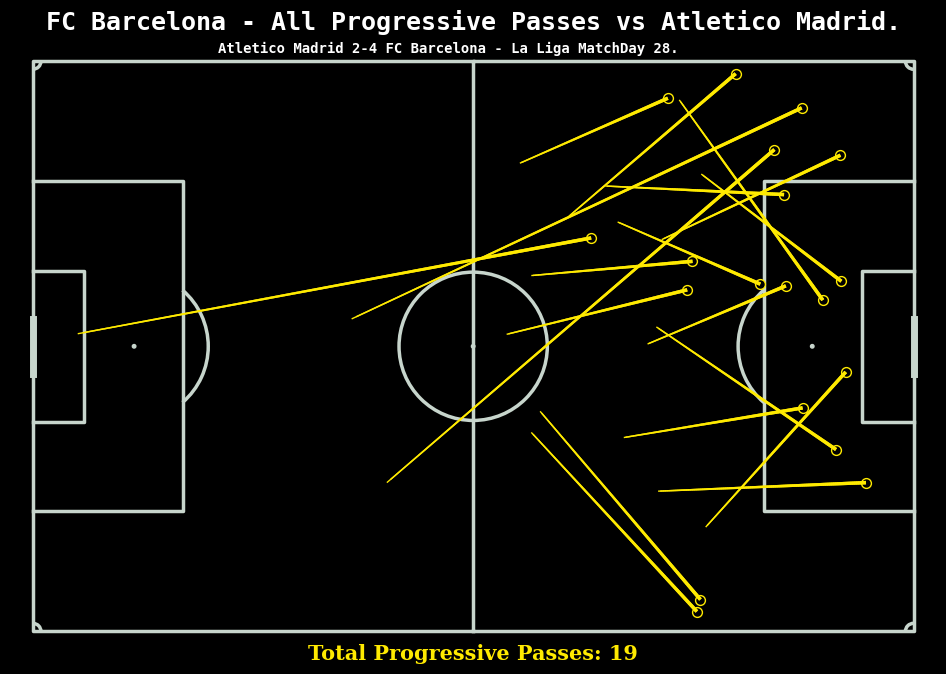

In [199]:
pitch = Pitch(pitch_type='opta', pitch_color='black', line_color='#c7d5cc', linewidth = 2.5, corner_arcs = True)
fig, ax = pitch.draw(figsize=(12,8), constrained_layout=True, tight_layout=False)
fig.set_facecolor('black')

pitch.lines(progressive_passes.x, progressive_passes.y, progressive_passes.end_x, progressive_passes.end_y, color='#ffea00', comet = True, lw = 2.5, ax=ax, label='Key Pass')
ax.scatter(progressive_passes['end_x'], progressive_passes['end_y'], s=50, c='black', edgecolor='#ffea00')

ax.set_title("FC Barcelona - All Progressive Passes vs Atletico Madrid.", fontsize=18, fontfamily = "monospace", weight = 'bold', c = 'white')

highlight_text.fig_text(x = 0.30, y = 0.875,
                        s = 'Atletico Madrid 2-4 FC Barcelona - La Liga MatchDay 28.',
                        fontsize = 10,
                        color = 'white',
                        weight = 'bold',
                        fontfamily = 'monospace'
                       )

ax.text(50, -5, f"Total Progressive Passes: {progressive_passes_count}", fontsize=15, color="#ffea00", ha="center", fontfamily="serif", weight="bold")